# importe de modelo

In [35]:
from tensorflow.keras.applications import MobileNetV2

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D,Dense,Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image as image_ops
import matplotlib.pyplot as plt
import numpy as np
import os
import tkinter as tk
from tkinter import filedialog
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [37]:
img_width,img_height=224,224

model=MobileNetV2(weights='imagenet',
                include_top=False,
                input_shape=(img_height,img_width,3)
                )

In [38]:
def add_layer_at_bottom(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

# Aqui se cargan los datos

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
train_data_dir='gaby'
val_data_dir='gaby'
os.listdir(train_data_dir)

['benignas', 'malignas', 'normales']

In [41]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 fill_mode='nearest')

val_datagen=ImageDataGenerator(rescale=1./255)

In [42]:
batch_size=30

In [43]:
entrenador=train_datagen.flow_from_directory(train_data_dir,
                                                  target_size=(img_height,img_width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

validador=val_datagen.flow_from_directory(val_data_dir,
                                              target_size=(img_height,img_width),
                                              batch_size=batch_size,
                                              class_mode='categorical')
test_images,test_labels= next(validador)


Found 811 images belonging to 3 classes.
Found 811 images belonging to 3 classes.


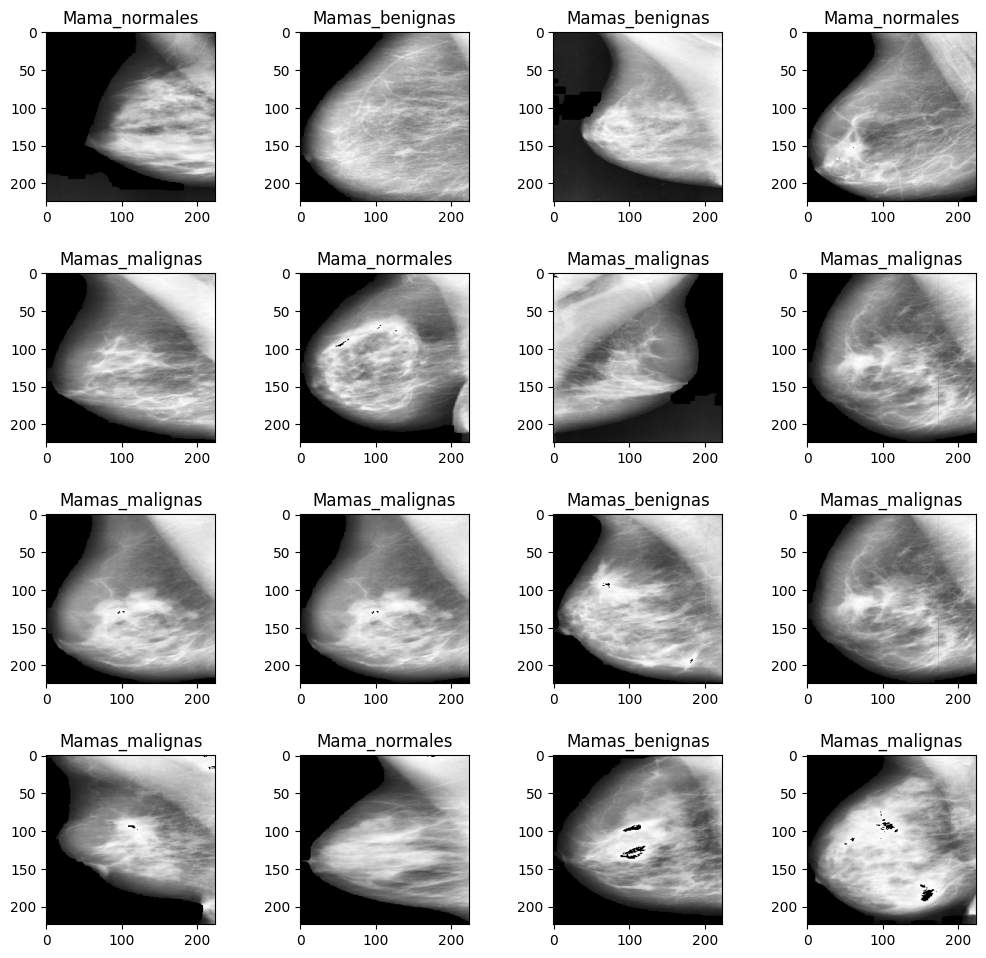

In [44]:
L = 4
W = 4
train_image,train_labels= next(entrenador)
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
label_names = {0 : 'Mamas_benignas', 1 : 'Mamas_malignas' , 2: 'Mama_normales'}

for i in np.arange(0, L*W):
    axes[i].imshow(train_image[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    
    plt.subplots_adjust(wspace = 0.5)   

In [45]:
train_class_names = set()
num_train_samples=0
for i in entrenador.filenames:
    train_class_names.add(i.split('/')[0])
    num_train_samples+=1
#print(num_train_samples)
#train_class_names

In [46]:
val_class_names = set()
num_val_samples=0
for i in validador.filenames:
    val_class_names.add(i.split('/')[0])
    num_val_samples+=1
print(num_val_samples)
#val_class_names

811


In [47]:
num_classes=len(entrenador.class_indices)
print(num_classes)
FC_head=add_layer_at_bottom(model,
                            num_classes)

main_model=Model(inputs=model.input,
                 outputs=FC_head)

main_model.summary()

3
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']    

# Training

In [48]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [49]:

checkpoint = ModelCheckpoint("aprendizajeMamas.h5",
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=20,
                          verbose=1,
                          restore_best_weights=True)

callbacks=[checkpoint,earlystop]

main_model.compile(loss='categorical_crossentropy',
                   optimizer=RMSprop(learning_rate=0.0015),
                   metrics=['accuracy'])

epochs=25

batch_size = 32

history = main_model.fit(entrenador,
                         steps_per_epoch=num_train_samples//batch_size,
                         epochs=epochs,
                         callbacks=callbacks,
                         validation_data=validador,
                         validation_steps=num_val_samples//batch_size)






Epoch 1/25
25/25 [==============================] - ETA: 0s - loss: 1.8108 - accuracy: 0.5589
Epoch 1: val_loss improved from inf to 7.63865, saving model to aprendizajeMamas.h5
25/25 [==============================] - 49s 2s/step - loss: 1.8108 - accuracy: 0.5589 - val_loss: 7.6386 - val_accuracy: 0.5373
Epoch 2/25
25/25 [==============================] - ETA: 0s - loss: 0.8016 - accuracy: 0.6477
Epoch 2: val_loss improved from 7.63865 to 2.05452, saving model to aprendizajeMamas.h5
25/25 [==============================] - 46s 2s/step - loss: 0.8016 - accuracy: 0.6477 - val_loss: 2.0545 - val_accuracy: 0.5413
Epoch 3/25
25/25 [==============================] - ETA: 0s - loss: 0.7377 - accuracy: 0.6921
Epoch 3: val_loss did not improve from 2.05452
25/25 [==============================] - 46s 2s/step - loss: 0.7377 - accuracy: 0.6921 - val_loss: 10.6562 - val_accuracy: 0.5373
Epoch 4/25
25/25 [==============================] - ETA: 0s - loss: 0.7155 - accuracy: 0.6613
Epoch 4: val_loss

Archivo seleccionado:  D:/Practicas_Python/inv/gaby/malignas/aaevifnspi.png
1/1 [==============================] - 0s 335ms/step
[[1.1133518e-32 1.0000000e+00 1.1880831e-21]]


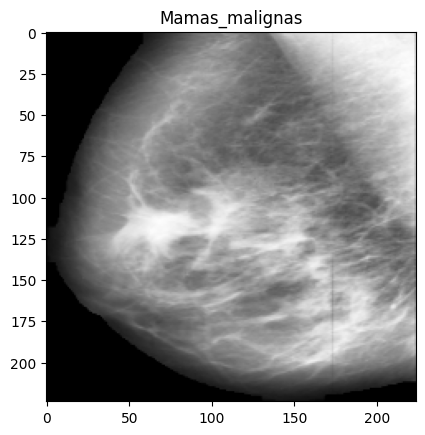

Archivo seleccionado:  D:/Practicas_Python/inv/gaby/benignas/abweybnpze.png
1/1 [==============================] - 0s 25ms/step
[[1.5343283e-23 1.0000000e+00 3.2075266e-16]]


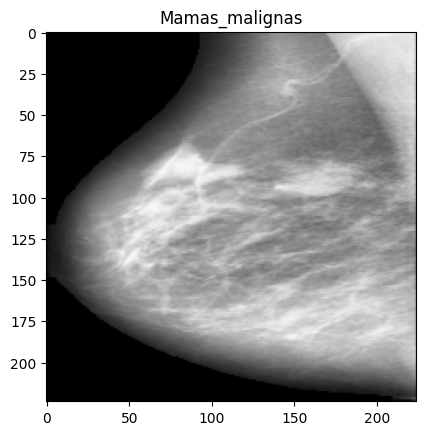

Archivo seleccionado:  D:/Practicas_Python/inv/gaby/normales/bczosmaqnq.png
1/1 [==============================] - 0s 24ms/step
[[1.0639575e-17 1.0000000e+00 5.7387374e-13]]


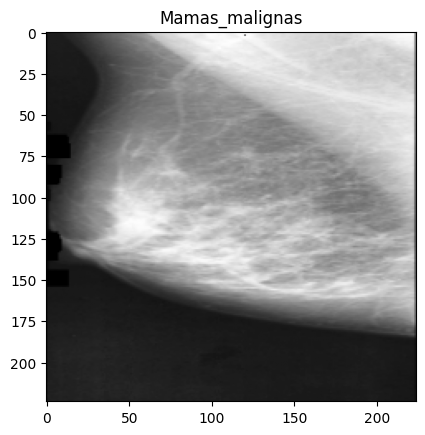

In [50]:
def abrir_archivo():
    file = filedialog.askopenfilename(initialdir="/", title="Seleccione archivo")
    if file:
        print("Archivo seleccionado: ", file)
        out=['Mamas_benignas', 'Mamas_malignas', 'Mama_normales']
        img=cv2.imread(file)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(224,224))
        img=img/255.
        mostrar_imagen_con_titulo(img, out)

def mostrar_imagen_con_titulo(img, out):
    plt.imshow(img)
    img=img.reshape(1,224,224,3)
    res=main_model.predict(img)
    print(res)
    plt.title(out[np.argmax(res)])
    plt.show()

app = tk.Tk()
app.geometry("400x300")
app.title("Selector de archivos")

button = tk.Button(app, text="Abrir archivo", command=abrir_archivo)
button.pack(pady=20)

app.mainloop()